## IMPORTANDO PACOTES

In [1]:
import numpy as np
import pandas as pd
import xlrd
import itertools
import pylab
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, SelectPercentile, chi2
import seaborn as sns
%matplotlib inline

# mostrar todas as colunas #
pd.pandas.set_option('display.max_columns', None)

# mostrar todas as linhas #
pd.pandas.set_option('display.max_rows', None)

# retira avisos #
pd.options.mode.chained_assignment = None  #hide any pandas warnings

# formatando os float #
pd.options.display.float_format = '{:,.2f}'.format

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## IMPORTANDO BASE DE DADOS

#### carregar as váriaveis binarias como categoricas: 1= SIM , 0= NÃO

In [2]:
bd = pd.read_csv('EP_HABILITADOS_SEGMENTACAO-AMOSTRA.txt', sep=';', encoding='latin-1', error_bad_lines=False)

In [3]:
bd = bd.copy().set_index('CodCli')

In [4]:
bd.shape

(10000, 82)

In [5]:
bd.head()

,NUM_CPF,SK_CLIENTE,DSC_PERFIL_RECLASSIFICACAO,ValOFF,TktOFF,TktMed_OFF,ValON,TktON,TktMed_ON,ValECOM,TktECOM,TktMed_ECOM,ItensTot,TicketsTot,ValorTot,ItensInf,TicketsInf,ValorInf,ItensFem,TicketsFem,ValorFem,ItensMas,TicketsMas,ValorMas,ItensLar,TicketsLar,ValorLar,ItensCal,TicketsCal,ValorCal,ItensEle,TicketsEle,ValorEle,ItensPer,TicketsPer,ValorPer,ATV_OFF,ATV_ON,ATV_ECOM,Sexo,DtNasc,DescEstCivil,DescEscol,ValRendaFam,ValRendaTit,DescSitRes,DtCad,TP_CARTAO,QtdFilho,QtdFilhoMenor,DtUltCompra,ValLimCred,ValSldDisp,ValCompraVidaRiachu,QtdCompraVidaRiachu,CodFilPrefCompra,NomFil,CodUF,CodRegiao,SEGMENTO,IDADE,TMP_CAD,CARTAO,FX_IDADE,FX_RENDA_FAM,FX_RENDA_TIT,IND_FILHOS,IND_FIL_MENOR,FX_TMP_CAD,EP_QTD,EP_ValCred,EP_ValTrans,EP_QtdParc,PF,APP,PUBLICO,VLR_LIMITE_EP,FX_RISCO,VAL_NOVO_LIMITE_CREDITO,VAL_DISPONIVEL_EMPRESTIMO,PERC_CONSUMO,RESPOSTA
CodCli,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2204707103,626775,785179,BD-07 VISA-NREN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,0,0,FEM,18JUL1953:00:00:00.000,CASADO,SEGUNDO GRAU COMPLETO,"1,500.00","1,500.00",PROPRIA QUITADA,18APR2015:14:56:18.263,BANDEIRA,0,0,NaN,"2,550.00","2,786.92",nan,nan,2204,RIO METROPOLITANO SH,RJ,SE,00.NUNCA ATIVADO,66,4,BD,6.>60A,4.<=1500,4.<=1500,NÃO,NÃO,2.<=5A,nan,nan,nan,nan,0,0,GENERICO,"3,000.00",FAIXA_7,"3,000.00","3,000.00",0.00,0
2317733035,2671719,27047981,Score N.R - F3,nan,nan,nan,181.00,3.00,60.33,nan,nan,nan,8.00,3.00,205.74,0.00,0.00,0.00,7.00,3.00,161.30,1.00,1.00,25.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,FEM,24DEC1966:00:00:00.000,SOLTEIRO,SEGUNDO GRAU INCOMPLETO,"1,500.00","1,500.00",ALUGADA,04JAN2019:20:12:20.620,PL,2,0,07AUG2019,250.00,162.30,180.74,3.00,2317,RJ SÃO GONÇALO PÁTIO ALCÂNTARA,RJ,SE,03.MEDIO,52,0,PL,5.<=60A,4.<=1500,4.<=1500,SIM,NÃO,1.<=2A,1.00,650.00,"1,279.08",6.00,1,0,DIAMOND,750.00,FAIXA_3,750.00,750.00,0.35,1
2026050588,5409004,21026975,BD-05 VISA-NREN,"6,623.12",108.00,61.33,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1,0,0,MAS,19OCT1982:00:00:00.000,CASADO,SEGUNDO GRAU COMPLETO,788.00,788.00,PROPRIA FINANCIADA,26APR2015:16:54:25.213,BANDEIRA,0,0,NaN,"3,550.00",373.21,nan,nan,2026,RS CANOAS SH,RS,S,00.NUNCA ATIVADO,36,4,BD,3.<=40A,3.<=1000,3.<=1000,NÃO,NÃO,2.<=5A,nan,nan,nan,nan,1,0,GENERICO,"3,800.00",FAIXA_5,"3,800.00","3,800.00",0.89,0
2086883424,6686214,13836825,BD-03 VISA-NREN,"4,747.15",50.00,94.94,"1,328.70",2.00,664.35,nan,nan,nan,5.00,2.00,"1,328.70",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,1.00,139.80,0.00,0.00,0.00,2.00,1.00,"1,149.00",0.00,0.00,0.00,1,1,0,FEM,04AUG1980:00:00:00.000,CASADO,SEGUNDO GRAU INCOMPLETO,825.00,825.00,PROPRIA QUITADA,26MAY2010:19:51:37.627,BANDEIRA,3,3,11JUL2019,"1,630.00",453.32,nan,nan,2086,AM MANAUS ER CT,AM,N,03.MEDIO,39,9,BD,3.<=40A,3.<=1000,3.<=1000,SIM,SIM,3.<=10A,nan,nan,nan,nan,1,1,GENERICO,"3,260.00",FAIXA_3,"3,260.00","3,260.00",0.72,0
2040765488,7431198,19792246,Score N.R - F3 (teste -4),nan,nan,nan,134.00,2.00,67.00,nan,nan,nan,4.00,2.00,133.60,0.00,0.00,0.00,0.00,0.00,0.00,3.00,1.00,39.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,FEM,23DEC1984:00:00:00.000,SOLTEIRO,SUPERIOR INCOMPLETO,350.00,350.00,COM OS PAIS,23OCT2006:19:36:58.000,PL,0,0,15JUN2019,"1,090.00","1,090.00","5,325.28",46.00,2040,GO ANÁPOLIS CT,GO,CO,04.BAIXO,34,12,PL,3.<=40A,1.<=500,1.<=500,NÃO,NÃO,3.>10A,nan,nan,nan,nan,1,0,GENERICO,"3,270.00",FAIXA_3,"3,270.00","3,270.00",0.00,0


In [6]:
#Transformando as váriaveis binárias em categoricas.

bd.update(bd['ATV_OFF'].replace(0, 'NAO'))
bd.update(bd['ATV_OFF'].replace(1, 'SIM'))

bd.update(bd['ATV_ON'].replace(0, 'NAO'))
bd.update(bd['ATV_ON'].replace(1, 'SIM'))

bd.update(bd['ATV_ECOM'].replace(0, 'NAO'))
bd.update(bd['ATV_ECOM'].replace(1, 'SIM'))

bd.update(bd['PF'].replace(0, 'NAO'))
bd.update(bd['PF'].replace(1, 'SIM'))

bd.update(bd['APP'].replace(0, 'NAO'))
bd.update(bd['APP'].replace(1, 'SIM'))

bd['RESPOSTA_2']=bd['RESPOSTA']
bd.update(bd['RESPOSTA_2'].replace(0, 'NAO'))
bd.update(bd['RESPOSTA_2'].replace(1, 'SIM'))

## CHECANDO VALORES NULOS

In [7]:
nulos = bd.columns[bd.isnull().any()]
valores_nulos = bd[nulos].isnull().sum()
valores_n_nulos = bd[nulos].count()
per_val_nulos= valores_nulos/(valores_nulos+valores_n_nulos)

In [8]:
bd_nulos=pd.concat([valores_nulos,per_val_nulos],axis=1,keys= {'Qtd','%'})
bd_nulos.sort_values(ascending = False, by='%')

,Qtd,%
TktMed_ECOM,9735,0.97
ValECOM,9735,0.97
TktECOM,9735,0.97
EP_QtdParc,9239,0.92
EP_ValTrans,9239,0.92
EP_ValCred,9239,0.92
EP_QTD,9239,0.92
TktOFF,6925,0.69
ValOFF,6925,0.69
TktMed_OFF,6925,0.69


#### o % de valores ausentes é alto, entretanto trata-se de valores transacionais, ou seja, os clientes não possuem transações neste periodo.

## ANALISE DESCRITIVA

### VARIAVEIS NUMÉRICAS

In [9]:
num_col = [var for var in bd.columns if bd[var].dtype != 'O']
bd_num = bd.loc[:,num_col]

In [10]:
def color_negative_red(value):
  """
  Colors elements in a dateframe
  green if positive and red if
  negative. Does not color NaN
  values.
  """

  if value < 0:
    color = 'red'
  elif value > 0:
    color = 'blue'
  else:
    color = 'black'

  return 'color: %s' % color

In [11]:
bd_num.describe().transpose().style.applymap(color_negative_red, subset=['min'])

,count,mean,std,min,25%,50%,75%,max
NUM_CPF,10000,3.37586e+10,3.01292e+10,626775,6.83416e+09,2.57866e+10,5.77312e+10,9.99414e+10
SK_CLIENTE,10000,1.5341e+07,8.52267e+06,2193,8.00092e+06,1.58978e+07,2.35372e+07,2.79454e+07
ValOFF,3075,5910.52,6335.41,1.07,1818.36,4078.34,7739.76,85238.9
TktOFF,3075,66.0062,75.6226,1,16,42,87,636
TktMed_OFF,3075,140.975,182.397,1.07,59.9247,94.1368,152.75,2580
ValON,7287,661.356,683.738,5.9,220,455,861.5,10198
TktON,7287,3.66516,3.44816,1,1,3,5,53
TktMed_ON,7287,199.75,154.478,5.9,103.013,160,249.325,1899
ValECOM,265,340.282,327.32,5.9,124,219.7,450,1977
TktECOM,265,1.83396,1.65224,1,1,1,2,13


#### o método de seleção de váriaveis não aceita valores negativos, caso ocorra é necessário tratar

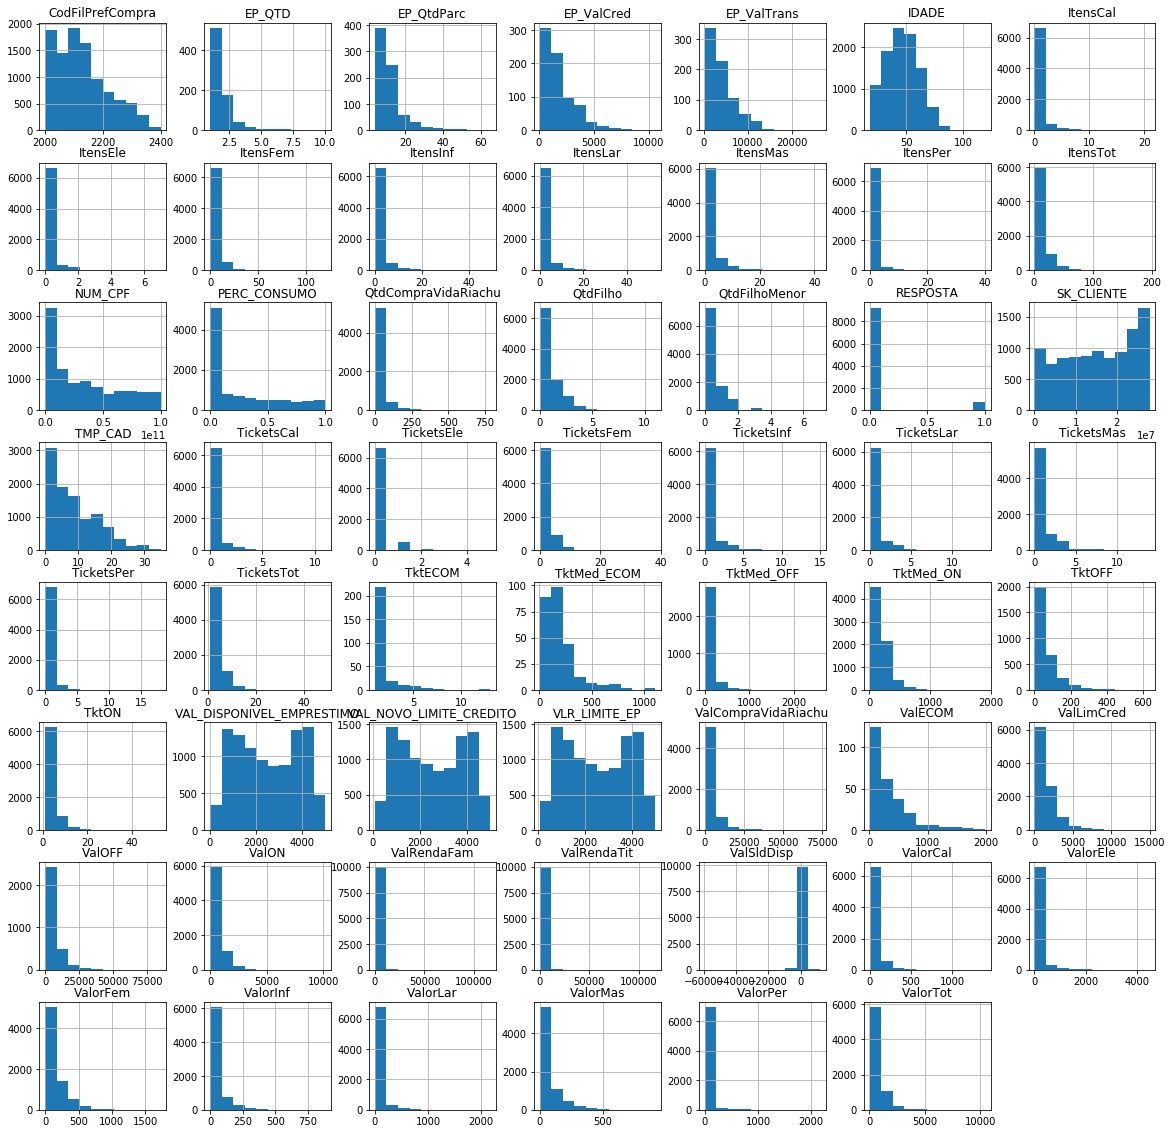

In [12]:
bd_num.hist(figsize=(20,20));

### VARIAVEIS CATEGORICAS

In [13]:
cat_col = [var for var in bd.columns if bd[var].dtype == 'O']
bd_cat = bd.loc[:,cat_col]

In [14]:
var=pd.concat([bd_cat['RESPOSTA_2'].value_counts(),bd_cat['RESPOSTA_2'].value_counts(normalize = True)], axis=1, keys={'Total','%'})
var

,Total,%
NAO,9239,0.92
SIM,761,0.08


In [15]:
bd_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 2204707103 to 2114049323
Data columns (total 28 columns):
DSC_PERFIL_RECLASSIFICACAO    10000 non-null object
ATV_OFF                       10000 non-null object
ATV_ON                        10000 non-null object
ATV_ECOM                      10000 non-null object
Sexo                          10000 non-null object
DtNasc                        10000 non-null object
DescEstCivil                  10000 non-null object
DescEscol                     10000 non-null object
DescSitRes                    10000 non-null object
DtCad                         10000 non-null object
TP_CARTAO                     10000 non-null object
DtUltCompra                   9240 non-null object
NomFil                        10000 non-null object
CodUF                         10000 non-null object
CodRegiao                     10000 non-null object
SEGMENTO                      10000 non-null object
CARTAO                        10000 non-null o

In [16]:
def Categorica (variavel1,variavel2):
    
    x=bd_cat[variavel1].value_counts(normalize = True)
    y=pd.crosstab(bd_cat[variavel1],bd_cat[variavel2], normalize= 'columns')
    
    result=pd.concat([x,y],  axis=1)
    result.rename(columns={variavel1: 'Geral'}, inplace=True)


    return result.style.format("{:.2%}")

In [17]:
Categorica('Sexo', 'RESPOSTA_2')

,Geral,NAO,SIM
Sexo,,,
FEM,79.94%,80.05%,78.58%
MAS,20.06%,19.95%,21.42%


In [18]:
Categorica('DescEstCivil', 'RESPOSTA_2')

,Geral,NAO,SIM
CASADO,48.04%,48.61%,41.13%
DESQ. / DIVORC. / SEP JUDICIAL,6.44%,6.31%,8.02%
SOLTEIRO,41.38%,40.92%,46.91%
VIUVO,4.14%,4.16%,3.94%


In [19]:
Categorica('DescEscol', 'RESPOSTA_2')

,Geral,NAO,SIM
ANALFABETO,0.10%,0.10%,0.13%
POS-GRADUACAO COMPLETA,2.66%,2.75%,1.58%
POS-GRADUACAO INCOMPLETA,0.47%,0.50%,0.13%
PRIMEIRO GRAU COMPLETO,7.35%,7.31%,7.88%
PRIMEIRO GRAU INCOMPLETO,5.69%,5.43%,8.80%
SEGUNDO GRAU COMPLETO,50.25%,49.86%,54.93%
SEGUNDO GRAU INCOMPLETO,4.61%,4.47%,6.31%
SEM IDENTIF NO CAD ANTIGO,0.04%,0.04%,0.00%
SUPERIOR COMPLETO,19.31%,19.85%,12.75%
SUPERIOR INCOMPLETO,9.52%,9.69%,7.49%


In [20]:
Categorica('DescSitRes', 'RESPOSTA_2')

,Geral,NAO,SIM
ALUGADA,10.26%,10.09%,12.35%
CEDIDA,4.54%,4.43%,5.91%
COM OS PAIS,11.83%,11.79%,12.35%
OUTROS,4.20%,4.17%,4.60%
PENSAO,0.11%,0.10%,0.26%
PROPRIA FINANCIADA,2.69%,2.75%,1.97%
PROPRIA QUITADA,66.37%,66.68%,62.55%


In [21]:
Categorica('TP_CARTAO', 'RESPOSTA_2')

,Geral,NAO,SIM
TP_CARTAO,,,
BANDEIRA,40.82%,39.63%,55.32%
PL,39.76%,40.57%,29.96%
PL_COM_BAND_EMITIDO,19.42%,19.81%,14.72%


In [22]:
Categorica('CodUF', 'RESPOSTA_2')

,Geral,NAO,SIM
AC,0.44%,0.43%,0.53%
AL,1.92%,1.90%,2.10%
AM,2.56%,2.39%,4.60%
AP,0.44%,0.41%,0.79%
BA,5.35%,5.35%,5.39%
CE,3.94%,3.80%,5.65%
DF,3.37%,3.37%,3.42%
ES,1.80%,1.84%,1.31%
GO,3.49%,3.52%,3.15%
MA,2.20%,2.12%,3.15%


In [23]:
Categorica('CodRegiao', 'RESPOSTA_2')

,Geral,NAO,SIM
CO,9.88%,9.94%,9.20%
N,7.62%,7.19%,12.88%
NE,28.16%,27.87%,31.67%
S,11.65%,11.80%,9.86%
SE,42.69%,43.21%,36.40%


In [24]:
Categorica('SEGMENTO', 'RESPOSTA_2')

,Geral,NAO,SIM
00.NUNCA ATIVADO,3.20%,3.30%,1.97%
01.VIP,5.90%,5.50%,10.78%
02.ALTO,20.47%,20.03%,25.76%
03.MEDIO,29.87%,29.66%,32.46%
04.BAIXO,21.38%,21.68%,17.74%
05.REATIVACAO,8.48%,8.73%,5.39%
09.INATIVOS,10.70%,11.09%,5.91%


In [25]:
Categorica('CARTAO', 'RESPOSTA_2')

,Geral,NAO,SIM
BD,40.82%,39.63%,55.32%
PL,59.18%,60.37%,44.68%


In [26]:
Categorica('PUBLICO', 'RESPOSTA_2')

,Geral,NAO,SIM
DIAMOND,11.55%,8.12%,53.22%
GENERICO,71.89%,74.72%,37.58%
LOW,16.56%,17.17%,9.20%


In [27]:
Categorica('FX_RISCO', 'RESPOSTA_2')

,Geral,NAO,SIM
FAIXA_1,0.74%,0.23%,6.96%
FAIXA_2,8.41%,7.24%,22.60%
FAIXA_3,29.58%,30.08%,23.52%
FAIXA_4,27.42%,27.80%,22.86%
FAIXA_5,10.71%,10.91%,8.28%
FAIXA_6,17.26%,17.72%,11.70%
FAIXA_7,5.88%,6.03%,4.07%


In [28]:
Categorica('APP', 'RESPOSTA_2')

,Geral,NAO,SIM
APP,,,
NAO,60.59%,60.73%,58.87%
SIM,39.41%,39.27%,41.13%


In [29]:
Categorica('PF', 'RESPOSTA_2')

,Geral,NAO,SIM
PF,,,
NAO,54.27%,55.92%,34.30%
SIM,45.73%,44.08%,65.70%


In [30]:
Categorica('ATV_ON', 'RESPOSTA_2')

,Geral,NAO,SIM
NAO,27.13%,28.09%,15.51%
SIM,72.87%,71.91%,84.49%


In [31]:
Categorica('ATV_OFF', 'RESPOSTA_2')

,Geral,NAO,SIM
ATV_OFF,,,
NAO,69.25%,70.87%,49.54%
SIM,30.75%,29.13%,50.46%


In [32]:
Categorica('ATV_ECOM', 'RESPOSTA_2')

,Geral,NAO,SIM
ATV_ECOM,,,
NAO,97.35%,97.26%,98.42%
SIM,2.65%,2.74%,1.58%


### Tratando o nome das variaveis

In [33]:
#retirando o espaço do texto

for x in bd_cat:
    bd.update(bd[x].str.replace(" ", ""))
    print (x)

DSC_PERFIL_RECLASSIFICACAO
ATV_OFF
ATV_ON
ATV_ECOM
Sexo
DtNasc
DescEstCivil
DescEscol
DescSitRes
DtCad
TP_CARTAO
DtUltCompra
NomFil
CodUF
CodRegiao
SEGMENTO
CARTAO
FX_IDADE
FX_RENDA_FAM
FX_RENDA_TIT
IND_FILHOS
IND_FIL_MENOR
FX_TMP_CAD
PF
APP
PUBLICO
FX_RISCO
RESPOSTA_2


### Tratando valores nulos

In [34]:
# neste caso os valores nulos estão sendo preenchidos com 0.

for x in nulos:
    bd[x].fillna(0, inplace=True)
    print (x)

ValOFF
TktOFF
TktMed_OFF
ValON
TktON
TktMed_ON
ValECOM
TktECOM
TktMed_ECOM
ItensTot
TicketsTot
ValorTot
ItensInf
TicketsInf
ValorInf
ItensFem
TicketsFem
ValorFem
ItensMas
TicketsMas
ValorMas
ItensLar
TicketsLar
ValorLar
ItensCal
TicketsCal
ValorCal
ItensEle
TicketsEle
ValorEle
ItensPer
TicketsPer
ValorPer
DtUltCompra
ValCompraVidaRiachu
QtdCompraVidaRiachu
EP_QTD
EP_ValCred
EP_ValTrans
EP_QtdParc


In [35]:
# excluindo variaveis que não serão utilizadas

bd.drop(['NUM_CPF','SK_CLIENTE',
         'ItensInf','TicketsInf','ValorInf',
         'ItensFem','TicketsFem','ValorFem',
         'ItensMas','TicketsMas','ValorMas',
         'ItensLar','TicketsLar','ValorLar',
         'ItensCal','TicketsCal','ValorCal',
         'ItensEle','TicketsEle','ValorEle',
         'ItensPer','TicketsPer','ValorPer',
         'DtNasc','QtdFilho','QtdFilhoMenor','DtUltCompra',
         'ValCompraVidaRiachu','QtdCompraVidaRiachu',
         'CodFilPrefCompra','NomFil',
         'FX_IDADE','FX_RENDA_FAM','FX_RENDA_TIT',
         'IND_FILHOS','IND_FIL_MENOR','FX_TMP_CAD',
         'EP_QTD','EP_ValCred','EP_ValTrans', 'EP_QtdParc',
         'PUBLICO','VAL_NOVO_LIMITE_CREDITO', 'DtCad', 
         'TP_CARTAO', 'ValSldDisp', 'VAL_DISPONIVEL_EMPRESTIMO', 'RESPOSTA_2' ],axis = 1, inplace = True)

### Criando Variaveis

#### na analise descritiva vimos que existe concentração em algumas faixas de valores, com isso vamos dividir as variaveis numericas em faixas e verificar se discrimina melhor.

In [36]:
# criando faixas em percentis #

def Percentil (variavel,variavel2):
    
    bd[variavel2]= bd[variavel]
    
    A1=np.percentile(bd[variavel],10)
    A2=np.percentile(bd[variavel],20)
    A3=np.percentile(bd[variavel],30)
    A4=np.percentile(bd[variavel],40)
    A5=np.percentile(bd[variavel],50)
    A6=np.percentile(bd[variavel],60)
    A7=np.percentile(bd[variavel],70)
    A8=np.percentile(bd[variavel],80)
    A9=np.percentile(bd[variavel],90)
    

    
    bd[variavel2][bd[variavel]<A1] = 'FAIXA1'
    bd[variavel2][(bd[variavel]>=A1)&(bd[variavel]<A2)] = 'FAIXA2'
    bd[variavel2][(bd[variavel]>=A2)&(bd[variavel]<A3)] = 'FAIXA3'
    bd[variavel2][(bd[variavel]>=A3)&(bd[variavel]<A4)] = 'FAIXA4'
    bd[variavel2][(bd[variavel]>=A4)&(bd[variavel]<A5)] = 'FAIXA5'
    bd[variavel2][(bd[variavel]>=A5)&(bd[variavel]<A6)] = 'FAIXA6'
    bd[variavel2][(bd[variavel]>=A6)&(bd[variavel]<A7)] = 'FAIXA7'
    bd[variavel2][(bd[variavel]>=A7)&(bd[variavel]<A8)] = 'FAIXA8'
    bd[variavel2][(bd[variavel]>=A8)&(bd[variavel]<A9)] = 'FAIXA8'
    bd[variavel2][(bd[variavel]>=A9)] = 'FAIXA10'
    
    return

In [37]:
## limite de credito
bd['ValLimCred_2']=bd['ValLimCred']

Percentil('ValLimCred','ValLimCred_2')

## valores OFF
bd['ValOFF_2']=bd['ValOFF']
bd['TktOFF_2']=bd['TktOFF']
bd['TktMed_OFF_2']=bd['TktMed_OFF']

Percentil('ValOFF','ValOFF_2')
Percentil('TktOFF','TktOFF_2')
Percentil('TktMed_OFF','TktMed_OFF_2')

## valores ON
bd['ValON_2']=bd['ValON']
bd['TktON_2']=bd['TktON']
bd['TktMed_ON_2']=bd['TktMed_ON']

Percentil('ValON','ValON_2')
Percentil('TktON','TktON_2')
Percentil('TktMed_ON','TktMed_ON_2')

## ECOM
bd['ValECOM_2']=bd['ValECOM']
bd['TktECOM_2']=bd['TktECOM']
bd['TktMed_ECOM_2']=bd['TktMed_ECOM']
 
Percentil('ValECOM','ValECOM_2')
Percentil('TktECOM','TktECOM_2')
Percentil('TktMed_ECOM_2','TktMed_ECOM')

## Totais
bd['ItensTot_2']=bd['ItensTot']
bd['ValorTot_2']=bd['ValorTot']
bd['TicketsTot_2']=bd['TicketsTot']

Percentil('ItensTot','ItensTot_2')
Percentil('ValorTot','ValorTot_2')
Percentil('TicketsTot','TicketsTot_2')

## Socio Demograficas

bd['ValRendaFam_2']=bd['ValRendaFam']
bd['ValRendaTit_2']=bd['ValRendaTit']
bd['IDADE_2']=bd['IDADE']
bd['TMP_CAD_2']=bd['TMP_CAD']
bd['VLR_LIMITE_EP_2']=bd['VLR_LIMITE_EP']
bd['PERC_CONSUMO_2']=bd['PERC_CONSUMO']

Percentil('ValRendaFam','ValRendaFam_2')
Percentil('ValRendaTit','ValRendaTit_2')
Percentil('IDADE','IDADE_2')
Percentil('TMP_CAD','TMP_CAD_2')
Percentil('VLR_LIMITE_EP','VLR_LIMITE_EP_2')
Percentil('PERC_CONSUMO','PERC_CONSUMO_2')

## TRANSFORMANDO EM DUMMY

In [38]:
bd_tratado = pd.get_dummies(bd)

In [39]:
bd_tratado.head()

,ValOFF,TktOFF,TktMed_OFF,ValON,TktON,TktMed_ON,ValECOM,TktECOM,ItensTot,TicketsTot,ValorTot,ValRendaFam,ValRendaTit,ValLimCred,IDADE,TMP_CAD,VLR_LIMITE_EP,PERC_CONSUMO,RESPOSTA,TktMed_ECOM_2,DSC_PERFIL_RECLASSIFICACAO_BD-01VISA-NREN,DSC_PERFIL_RECLASSIFICACAO_BD-01VISA-NREN(teste-4),DSC_PERFIL_RECLASSIFICACAO_BD-02MASTER-NREN,DSC_PERFIL_RECLASSIFICACAO_BD-02MASTER-NREN(teste-4),DSC_PERFIL_RECLASSIFICACAO_BD-02VISA-NREN,DSC_PERFIL_RECLASSIFICACAO_BD-02VISA-NREN(teste-4),DSC_PERFIL_RECLASSIFICACAO_BD-03MASTER-NREN,DSC_PERFIL_RECLASSIFICACAO_BD-03MASTER-NREN(teste-4),DSC_PERFIL_RECLASSIFICACAO_BD-03VISA-NREN,DSC_PERFIL_RECLASSIFICACAO_BD-03VISA-NREN(teste-4),DSC_PERFIL_RECLASSIFICACAO_BD-04MASTER-NREN,DSC_PERFIL_RECLASSIFICACAO_BD-04MASTER-NREN(teste-4),DSC_PERFIL_RECLASSIFICACAO_BD-04VISA-NREN,DSC_PERFIL_RECLASSIFICACAO_BD-04VISA-NREN(teste-4),DSC_PERFIL_RECLASSIFICACAO_BD-05MASTER-NREN,DSC_PERFIL_RECLASSIFICACAO_BD-05VISA-NREN,DSC_PERFIL_RECLASSIFICACAO_BD-05VISA-NREN(teste-4),DSC_PERFIL_RECLASSIFICACAO_BD-06MASTER-NREN,DSC_PERFIL_RECLASSIFICACAO_BD-06MASTER-NREN(teste-4),DSC_PERFIL_RECLASSIFICACAO_BD-06VISA-NREN,DSC_PERFIL_RECLASSIFICACAO_BD-06VISA-NREN(teste-4),DSC_PERFIL_RECLASSIFICACAO_BD-07MASTER-NREN,DSC_PERFIL_RECLASSIFICACAO_BD-07MASTER-NREN(teste-4),DSC_PERFIL_RECLASSIFICACAO_BD-07VISA-NREN,DSC_PERFIL_RECLASSIFICACAO_ScoreN.R-F1,DSC_PERFIL_RECLASSIFICACAO_ScoreN.R-F1(teste-4),DSC_PERFIL_RECLASSIFICACAO_ScoreN.R-F2,DSC_PERFIL_RECLASSIFICACAO_ScoreN.R-F2(teste-11.59),DSC_PERFIL_RECLASSIFICACAO_ScoreN.R-F2(teste-4),DSC_PERFIL_RECLASSIFICACAO_ScoreN.R-F3,DSC_PERFIL_RECLASSIFICACAO_ScoreN.R-F3(teste-4),DSC_PERFIL_RECLASSIFICACAO_ScoreN.R-F3Mulher,DSC_PERFIL_RECLASSIFICACAO_ScoreN.R-F4,DSC_PERFIL_RECLASSIFICACAO_ScoreN.R-F4(teste-4),DSC_PERFIL_RECLASSIFICACAO_ScoreN.R-F4Mulher,DSC_PERFIL_RECLASSIFICACAO_ScoreN.R-F5,DSC_PERFIL_RECLASSIFICACAO_ScoreN.R-F5(teste-4),DSC_PERFIL_RECLASSIFICACAO_ScoreN.R-F6,DSC_PERFIL_RECLASSIFICACAO_ScoreN.R-F6(teste-4),DSC_PERFIL_RECLASSIFICACAO_ScoreN.R-F7,DSC_PERFIL_RECLASSIFICACAO_ScoreN.R-F7(teste-4),TktMed_ECOM_FAIXA10,ATV_OFF_NAO,ATV_OFF_SIM,ATV_ON_NAO,ATV_ON_SIM,ATV_ECOM_NAO,ATV_ECOM_SIM,Sexo_FEM,Sexo_MAS,DescEstCivil_CASADO,DescEstCivil_DESQ./DIVORC./SEPJUDICIAL,DescEstCivil_SOLTEIRO,DescEstCivil_VIUVO,DescEscol_ANALFABETO,DescEscol_POS-GRADUACAOCOMPLETA,DescEscol_POS-GRADUACAOINCOMPLETA,DescEscol_PRIMEIROGRAUCOMPLETO,DescEscol_PRIMEIROGRAUINCOMPLETO,DescEscol_SEGUNDOGRAUCOMPLETO,DescEscol_SEGUNDOGRAUINCOMPLETO,DescEscol_SEMIDENTIFNOCADANTIGO,DescEscol_SUPERIORCOMPLETO,DescEscol_SUPERIORINCOMPLETO,DescSitRes_ALUGADA,DescSitRes_CEDIDA,DescSitRes_COMOSPAIS,DescSitRes_OUTROS,DescSitRes_PENSAO,DescSitRes_PROPRIAFINANCIADA,DescSitRes_PROPRIAQUITADA,CodUF_AC,CodUF_AL,CodUF_AM,CodUF_AP,CodUF_BA,CodUF_CE,CodUF_DF,CodUF_ES,CodUF_GO,CodUF_MA,CodUF_MG,CodUF_MS,CodUF_MT,CodUF_PA,CodUF_PB,CodUF_PE,CodUF_PI,CodUF_PR,CodUF_RJ,CodUF_RN,CodUF_RO,CodUF_RR,CodUF_RS,CodUF_SC,CodUF_SE,CodUF_SP,CodUF_TO,CodRegiao_CO,CodRegiao_N,CodRegiao_NE,CodRegiao_S,CodRegiao_SE,SEGMENTO_00.NUNCAATIVADO,SEGMENTO_01.VIP,SEGMENTO_02.ALTO,SEGMENTO_03.MEDIO,SEGMENTO_04.BAIXO,SEGMENTO_05.REATIVACAO,SEGMENTO_09.INATIVOS,CARTAO_BD,CARTAO_PL,PF_NAO,PF_SIM,APP_NAO,APP_SIM,FX_RISCO_FAIXA_1,FX_RISCO_FAIXA_2,FX_RISCO_FAIXA_3,FX_RISCO_FAIXA_4,FX_RISCO_FAIXA_5,FX_RISCO_FAIXA_6,FX_RISCO_FAIXA_7,ValLimCred_2_FAIXA1,ValLimCred_2_FAIXA10,ValLimCred_2_FAIXA2,ValLimCred_2_FAIXA3,ValLimCred_2_FAIXA4,ValLimCred_2_FAIXA5,ValLimCred_2_FAIXA6,ValLimCred_2_FAIXA7,ValLimCred_2_FAIXA8,ValOFF_2_FAIXA10,ValOFF_2_FAIXA7,ValOFF_2_FAIXA8,TktOFF_2_FAIXA10,TktOFF_2_FAIXA7,TktOFF_2_FAIXA8,TktMed_OFF_2_FAIXA10,TktMed_OFF_2_FAIXA7,TktMed_OFF_2_FAIXA8,ValON_2_FAIXA10,ValON_2_FAIXA3,ValON_2_FAIXA4,ValON_2_FAIXA5,ValON_2_FAIXA6,ValON_2_FAIXA7,ValON_2_FAIXA8,TktON_2_FAIXA10,TktON_2_FAIXA3,TktON_2_FAIXA5,TktON_2_FAIXA7,TktON_2_FAIXA8,TktMed_ON_2_FAIXA10,TktMed_ON_2_FAIXA3,TktMed_ON_2_FAIXA4,TktMed_ON_2_FAIXA5,TktMed_ON_2_FAIXA6,TktMed_ON_2_FAIXA7,TktMed_ON_2_FAIXA8

## CHECANDO CORRELAÇÃO COM A VARIAVEL RESPOSTA

#### variaveis com alta correlação, devem ser retiradas da base

In [40]:
bd_correl = bd_tratado
corr = bd_correl.corr()
corr = pd.DataFrame(corr['RESPOSTA'])

In [41]:
corr_positiva=corr[(corr['RESPOSTA'] > 0.5)]
corr_positiva

,RESPOSTA
RESPOSTA,1.00


In [42]:
corr_negativa=corr[(corr['RESPOSTA'] < -0.5)]
corr_negativa

,RESPOSTA


## MODELAGEM

### Seleção de Variaveis 

In [43]:
Y = pd.DataFrame(bd_tratado['RESPOSTA']).copy()
Y.head()

,RESPOSTA
CodCli,
2204707103,0
2317733035,1
2026050588,0
2086883424,0
2040765488,0


In [44]:
X = pd.DataFrame(bd_tratado).copy()
X.drop(['RESPOSTA'],axis = 1, inplace = True)

In [45]:
X.head()

,ValOFF,TktOFF,TktMed_OFF,ValON,TktON,TktMed_ON,ValECOM,TktECOM,ItensTot,TicketsTot,ValorTot,ValRendaFam,ValRendaTit,ValLimCred,IDADE,TMP_CAD,VLR_LIMITE_EP,PERC_CONSUMO,TktMed_ECOM_2,DSC_PERFIL_RECLASSIFICACAO_BD-01VISA-NREN,DSC_PERFIL_RECLASSIFICACAO_BD-01VISA-NREN(teste-4),DSC_PERFIL_RECLASSIFICACAO_BD-02MASTER-NREN,DSC_PERFIL_RECLASSIFICACAO_BD-02MASTER-NREN(teste-4),DSC_PERFIL_RECLASSIFICACAO_BD-02VISA-NREN,DSC_PERFIL_RECLASSIFICACAO_BD-02VISA-NREN(teste-4),DSC_PERFIL_RECLASSIFICACAO_BD-03MASTER-NREN,DSC_PERFIL_RECLASSIFICACAO_BD-03MASTER-NREN(teste-4),DSC_PERFIL_RECLASSIFICACAO_BD-03VISA-NREN,DSC_PERFIL_RECLASSIFICACAO_BD-03VISA-NREN(teste-4),DSC_PERFIL_RECLASSIFICACAO_BD-04MASTER-NREN,DSC_PERFIL_RECLASSIFICACAO_BD-04MASTER-NREN(teste-4),DSC_PERFIL_RECLASSIFICACAO_BD-04VISA-NREN,DSC_PERFIL_RECLASSIFICACAO_BD-04VISA-NREN(teste-4),DSC_PERFIL_RECLASSIFICACAO_BD-05MASTER-NREN,DSC_PERFIL_RECLASSIFICACAO_BD-05VISA-NREN,DSC_PERFIL_RECLASSIFICACAO_BD-05VISA-NREN(teste-4),DSC_PERFIL_RECLASSIFICACAO_BD-06MASTER-NREN,DSC_PERFIL_RECLASSIFICACAO_BD-06MASTER-NREN(teste-4),DSC_PERFIL_RECLASSIFICACAO_BD-06VISA-NREN,DSC_PERFIL_RECLASSIFICACAO_BD-06VISA-NREN(teste-4),DSC_PERFIL_RECLASSIFICACAO_BD-07MASTER-NREN,DSC_PERFIL_RECLASSIFICACAO_BD-07MASTER-NREN(teste-4),DSC_PERFIL_RECLASSIFICACAO_BD-07VISA-NREN,DSC_PERFIL_RECLASSIFICACAO_ScoreN.R-F1,DSC_PERFIL_RECLASSIFICACAO_ScoreN.R-F1(teste-4),DSC_PERFIL_RECLASSIFICACAO_ScoreN.R-F2,DSC_PERFIL_RECLASSIFICACAO_ScoreN.R-F2(teste-11.59),DSC_PERFIL_RECLASSIFICACAO_ScoreN.R-F2(teste-4),DSC_PERFIL_RECLASSIFICACAO_ScoreN.R-F3,DSC_PERFIL_RECLASSIFICACAO_ScoreN.R-F3(teste-4),DSC_PERFIL_RECLASSIFICACAO_ScoreN.R-F3Mulher,DSC_PERFIL_RECLASSIFICACAO_ScoreN.R-F4,DSC_PERFIL_RECLASSIFICACAO_ScoreN.R-F4(teste-4),DSC_PERFIL_RECLASSIFICACAO_ScoreN.R-F4Mulher,DSC_PERFIL_RECLASSIFICACAO_ScoreN.R-F5,DSC_PERFIL_RECLASSIFICACAO_ScoreN.R-F5(teste-4),DSC_PERFIL_RECLASSIFICACAO_ScoreN.R-F6,DSC_PERFIL_RECLASSIFICACAO_ScoreN.R-F6(teste-4),DSC_PERFIL_RECLASSIFICACAO_ScoreN.R-F7,DSC_PERFIL_RECLASSIFICACAO_ScoreN.R-F7(teste-4),TktMed_ECOM_FAIXA10,ATV_OFF_NAO,ATV_OFF_SIM,ATV_ON_NAO,ATV_ON_SIM,ATV_ECOM_NAO,ATV_ECOM_SIM,Sexo_FEM,Sexo_MAS,DescEstCivil_CASADO,DescEstCivil_DESQ./DIVORC./SEPJUDICIAL,DescEstCivil_SOLTEIRO,DescEstCivil_VIUVO,DescEscol_ANALFABETO,DescEscol_POS-GRADUACAOCOMPLETA,DescEscol_POS-GRADUACAOINCOMPLETA,DescEscol_PRIMEIROGRAUCOMPLETO,DescEscol_PRIMEIROGRAUINCOMPLETO,DescEscol_SEGUNDOGRAUCOMPLETO,DescEscol_SEGUNDOGRAUINCOMPLETO,DescEscol_SEMIDENTIFNOCADANTIGO,DescEscol_SUPERIORCOMPLETO,DescEscol_SUPERIORINCOMPLETO,DescSitRes_ALUGADA,DescSitRes_CEDIDA,DescSitRes_COMOSPAIS,DescSitRes_OUTROS,DescSitRes_PENSAO,DescSitRes_PROPRIAFINANCIADA,DescSitRes_PROPRIAQUITADA,CodUF_AC,CodUF_AL,CodUF_AM,CodUF_AP,CodUF_BA,CodUF_CE,CodUF_DF,CodUF_ES,CodUF_GO,CodUF_MA,CodUF_MG,CodUF_MS,CodUF_MT,CodUF_PA,CodUF_PB,CodUF_PE,CodUF_PI,CodUF_PR,CodUF_RJ,CodUF_RN,CodUF_RO,CodUF_RR,CodUF_RS,CodUF_SC,CodUF_SE,CodUF_SP,CodUF_TO,CodRegiao_CO,CodRegiao_N,CodRegiao_NE,CodRegiao_S,CodRegiao_SE,SEGMENTO_00.NUNCAATIVADO,SEGMENTO_01.VIP,SEGMENTO_02.ALTO,SEGMENTO_03.MEDIO,SEGMENTO_04.BAIXO,SEGMENTO_05.REATIVACAO,SEGMENTO_09.INATIVOS,CARTAO_BD,CARTAO_PL,PF_NAO,PF_SIM,APP_NAO,APP_SIM,FX_RISCO_FAIXA_1,FX_RISCO_FAIXA_2,FX_RISCO_FAIXA_3,FX_RISCO_FAIXA_4,FX_RISCO_FAIXA_5,FX_RISCO_FAIXA_6,FX_RISCO_FAIXA_7,ValLimCred_2_FAIXA1,ValLimCred_2_FAIXA10,ValLimCred_2_FAIXA2,ValLimCred_2_FAIXA3,ValLimCred_2_FAIXA4,ValLimCred_2_FAIXA5,ValLimCred_2_FAIXA6,ValLimCred_2_FAIXA7,ValLimCred_2_FAIXA8,ValOFF_2_FAIXA10,ValOFF_2_FAIXA7,ValOFF_2_FAIXA8,TktOFF_2_FAIXA10,TktOFF_2_FAIXA7,TktOFF_2_FAIXA8,TktMed_OFF_2_FAIXA10,TktMed_OFF_2_FAIXA7,TktMed_OFF_2_FAIXA8,ValON_2_FAIXA10,ValON_2_FAIXA3,ValON_2_FAIXA4,ValON_2_FAIXA5,ValON_2_FAIXA6,ValON_2_FAIXA7,ValON_2_FAIXA8,TktON_2_FAIXA10,TktON_2_FAIXA3,TktON_2_FAIXA5,TktON_2_FAIXA7,TktON_2_FAIXA8,TktMed_ON_2_FAIXA10,TktMed_ON_2_FAIXA3,TktMed_ON_2_FAIXA4,TktMed_ON_2_FAIXA5,TktMed_ON_2_FAIXA6,TktMed_ON_2_FAIXA7,TktMed_ON_2_FAIXA8,ValECOM_

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, auc, mean_squared_log_error

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier 
import xgboost as xgb

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [47]:
# Qui- Quadrado #

chi_selector = SelectKBest(chi2) #k=10, por defaul#
chi_selector.fit(X,Y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)),'Quantidade de colunas selecionadas')

10 Quantidade de colunas selecionadas


In [48]:
# RFE #

from sklearn.feature_selection import RFE
rfe_selector = RFE(estimator=LogisticRegression(),n_features_to_select=10,step=10,verbose=5)
rfe_selector.fit(X,Y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)),'Quantidade de colunas selecionadas')

Fitting estimator with 250 features.


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting estimator with 240 features.
Fitting estimator with 230 features.
Fitting estimator with 220 features.
Fitting estimator with 210 features.
Fitting estimator with 200 features.
Fitting estimator with 190 features.
Fitting estimator with 180 features.
Fitting estimator with 170 features.
Fitting estimator with 160 features.
Fitting estimator with 150 features.
Fitting estimator with 140 features.
Fitting estimator with 130 features.
Fitting estimator with 120 features.
Fitting estimator with 110 features.
Fitting estimator with 100 features.
Fitting estimator with 90 features.
Fitting estimator with 80 features.
Fitting estimator with 70 features.
Fitting estimator with 60 features.
Fitting estimator with 50 features.
Fitting estimator with 40 features.
Fitting estimator with 30 features.
Fitting estimator with 20 features.
10 Quantidade de colunas selecionadas


In [49]:
# logistica #

from sklearn.feature_selection import SelectFromModel
embeded_lr_selector = SelectFromModel(LogisticRegression(),'1.25*median')
embeded_lr_selector.fit(X,Y)
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)),'Quantidade de colunas selecionadas')

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


112 Quantidade de colunas selecionadas


In [50]:
# Random Forest #

embeded_rf_selector = SelectFromModel(RandomForestClassifier(),threshold='1.25*median')
embeded_rf_selector.fit(X,Y)
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)),'Quantidade de colunas selecionadas')

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:169: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


92 Quantidade de colunas selecionadas


In [51]:
# LGBM #

from lightgbm import LGBMClassifier
lgbc=LGBMClassifier()

embeded_lgb_selector = SelectFromModel(lgbc, threshold='1.25*median')
embeded_lgb_selector.fit(X,Y)
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)),'Quantidade de colunas selecionadas')

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


112 Quantidade de colunas selecionadas


In [52]:
# tabela resultado #

pd.set_option('display.max_rows', None)

feature_selection_df = pd.DataFrame({'Feature':X.columns, 'Chi-2':chi_support, 'RFE':rfe_support, 
                                     'Logistics':embeded_lr_support, 'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})

feature_selection_df['Total']= np.sum(feature_selection_df, axis=1)

feature_selection_df = feature_selection_df.sort_values(['Total','Feature'], ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df

,Feature,Chi-2,RFE,Logistics,Random Forest,LightGBM,Total
1,FX_RISCO_FAIXA_1,False,True,True,True,True,4
2,ValorTot,True,False,False,True,True,3
3,ValRendaFam_2_FAIXA8,False,False,True,True,True,3
4,ValRendaFam,True,False,False,True,True,3
5,ValON,True,False,False,True,True,3
6,ValOFF,True,False,False,True,True,3
7,ValLimCred_2_FAIXA7,False,False,True,True,True,3
8,ValLimCred_2_FAIXA4,False,False,True,True,True,3
9,ValLimCred,True,False,False,True,True,3
10,VLR_LIMITE_EP_2_FAIXA3,False,False,True,True,True,3


In [53]:
colunas_modelo= feature_selection_df[feature_selection_df['Total']>=1]['Feature'].values

In [54]:
X2= X.loc[:,colunas_modelo]
X3= scaler.fit_transform(X2)

In [55]:
# modelos #

num_folds= 10
num_instances = len(X2)
seed = 7

modelos = []
modelos.append(('LR', LogisticRegression()))
#modelos.append(('LDA', LinearDriscriminantAnalysis()))
#modelos.append(('NB', GaussianNB()))
#modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
#modelos.append(('SVM', SVC()))
modelos.append(('ADA', AdaBoostClassifier()))
modelos.append(('GBM', GradientBoostingClassifier()))
modelos.append(('RF', RandomForestClassifier()))
modelos.append(('XGB', xgb.XGBClassifier()))

In [56]:
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold= model_selection.KFold(n_splits= num_folds, random_state= seed)
    cv_results = model_selection.cross_val_score(modelo, X2, Y, cv=kfold, scoring= 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print (msg)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

LR: 0.923800 (0.008953)
CART: 0.879000 (0.011000)


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

ADA: 0.932000 (0.008649)


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

GBM: 0.933600 (0.007605)


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was pa

RF: 0.927800 (0.008553)


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to 

XGB: 0.932000 (0.007912)


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#### o modelo que melhor performou foi o XGB

In [57]:
gboost = GradientBoostingClassifier()
gboost.fit(X2,Y)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

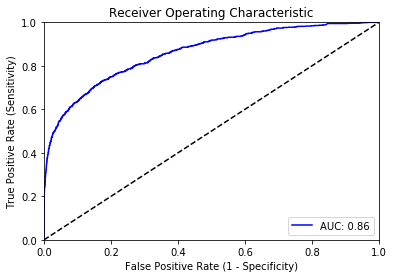

AUC: 0.86
RMSLE: 0.17


In [58]:
probs = gboost.predict_proba(X2)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(Y, preds)
roc_auc = auc(fpr, tpr)
rmsle = np.sqrt(mean_squared_log_error(Y, gboost.predict(X2)))


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC: %0.2f' % roc_auc )
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.gcf().set_size_inches(6, 4)
plt.show()


print( "%s: %0.2f" % ('AUC', roc_auc))
print("%s: %0.2f" % ('RMSLE', rmsle))

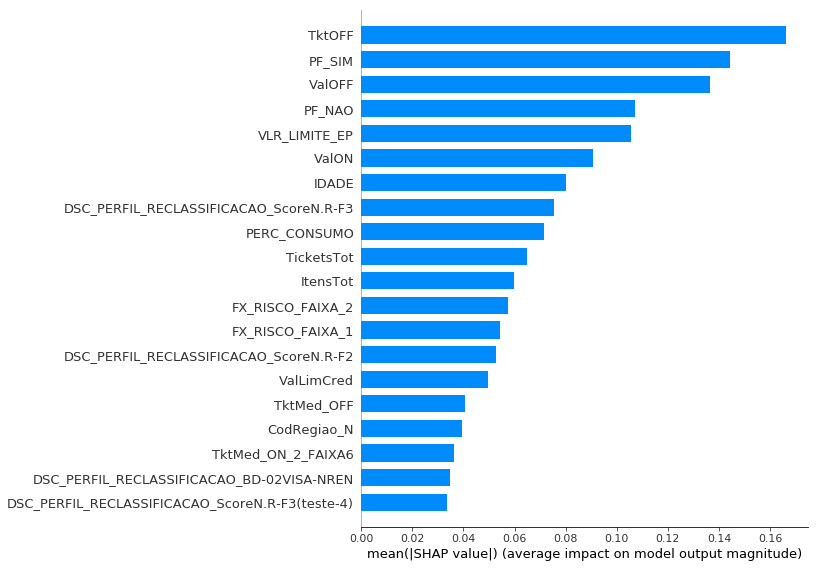

In [59]:
import shap

explainer = shap.TreeExplainer(gboost)
shap_values = explainer.shap_values(X2)
shap.summary_plot(shap_values, X2, plot_type= "bar")

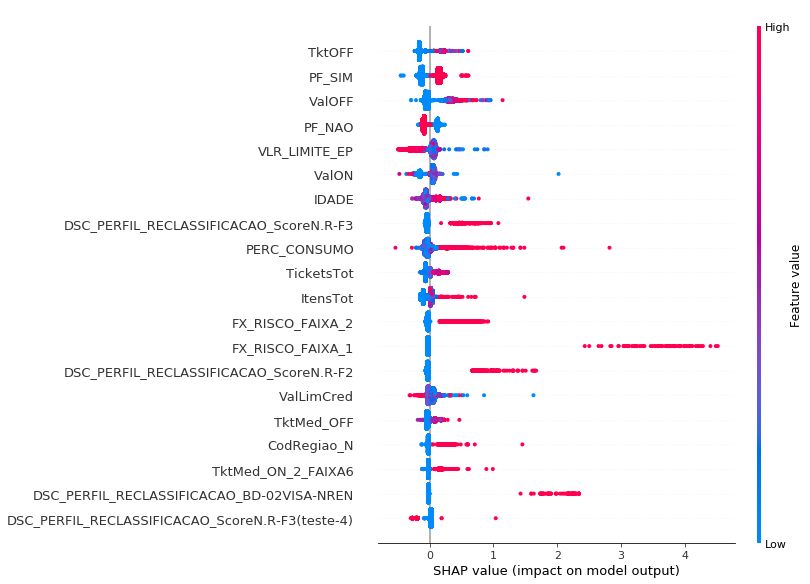

In [60]:
shap.summary_plot(shap_values, X2)